## Word2Vec

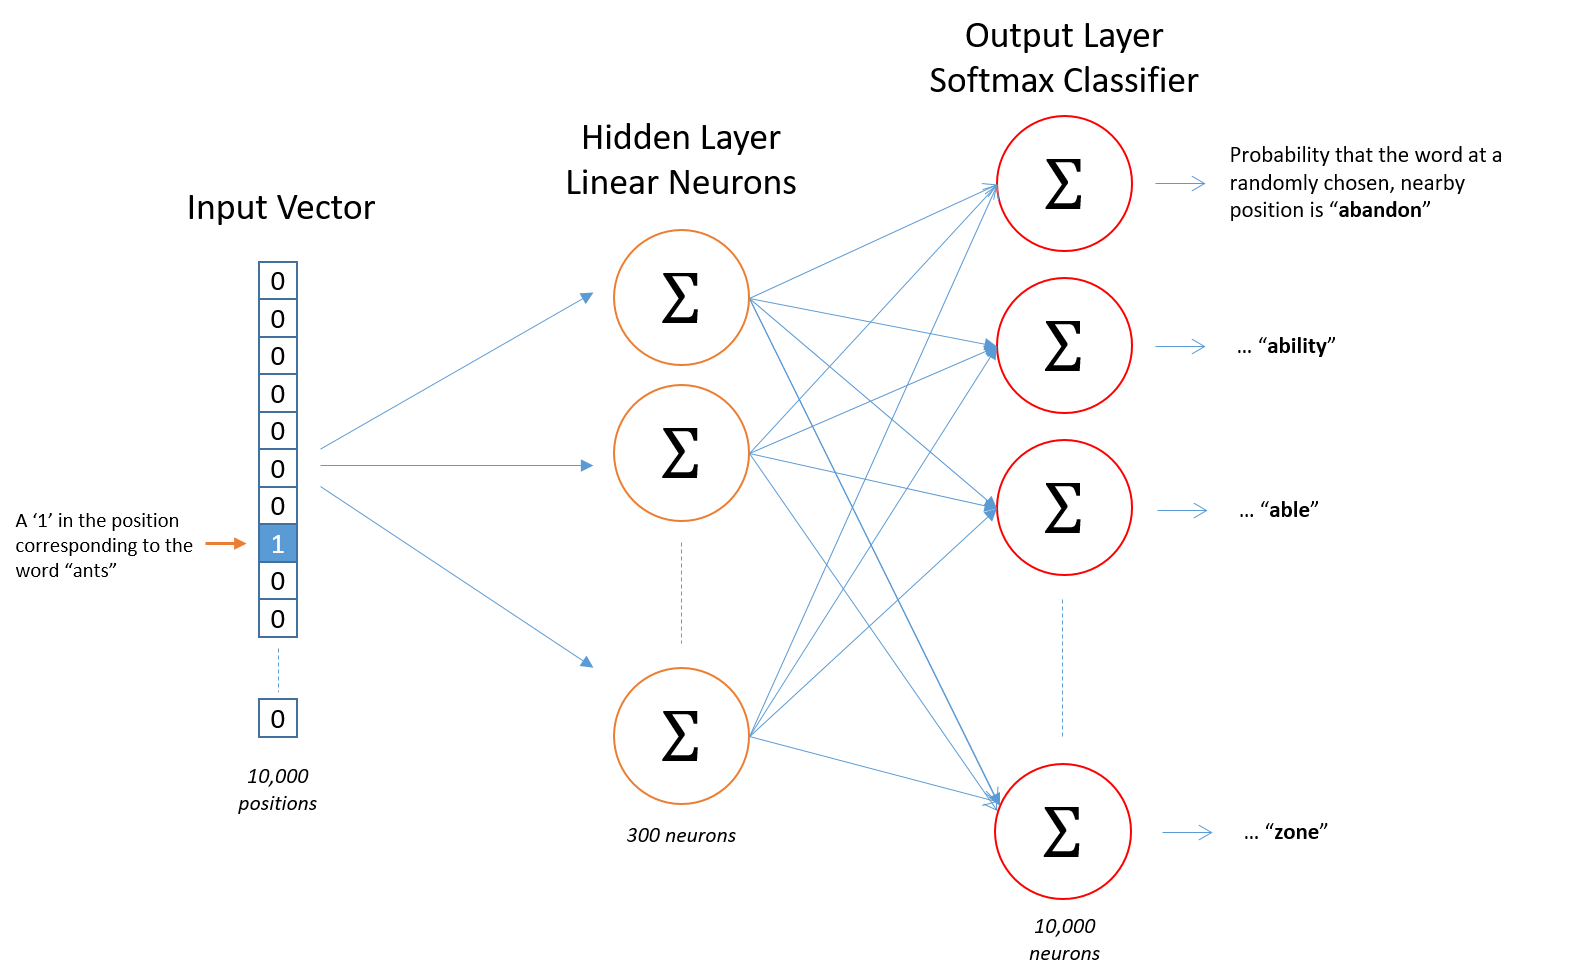

###Initialize a model

In [10]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


A common operation is to retrieve the vocabulary of a model. That is trivial:

In [31]:
for index, word in enumerate(wv.vocab):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.vocab)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


We can easily obtain vectors for terms the model is familiar with:

In [32]:
vec_king = wv['king']

In [33]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

Unfortunately, the model is unable to infer vectors for unfamiliar words. This is one limitation of Word2Vec: if this limitation matters to you, check out the FastText model.

In [34]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


Moving on, `Word2Vec` supports several word similarity tasks out of the box. You can see how the similarity intuitively decreases as the words get less and less similar.

In [35]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]

for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


Print the 5 most similar words to “car” or “minivan”

In [36]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


Which of the below does not belong in the sequence?

In [37]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


vec(“king”) - vec(“man”) + vec(“woman”) =~ vec(“queen”)

In [38]:
print(wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]


## Text Data

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=17sfD4POpqqK4cqJOo2e7b8fh1L0G7fQm&export=download